In [1]:
from omero.gateway import BlitzGateway
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
import napari
import pandas as pd
from scipy import ndimage as ndi
from skimage import measure, exposure
from skimage.segmentation import clear_border
from skimage.morphology import remove_small_objects

In [2]:
conn = BlitzGateway('hy274', 'omeroreset', host='ome2.hpc.susx.ac.uk')
conn.connect()

True

In [3]:
object= conn.getObject("Image", 310507)
pixels=object.getPrimaryPixels()

imgDAPI=pixels.getPlane(0,0,0)
imgCell=pixels.getPlane(0,3,0)
imgEdu=pixels.getPlane(0,1,0)
imgH3=pixels.getPlane(0,2,0)
img=np.stack((imgDAPI,imgCell,imgEdu,imgH3),axis=2)
img.shape

(1080, 1080, 4)

In [5]:
model_A=Cell_cycle_phase_(DAPI_channels=imgDAPI , EdU_channels=imgEdu,H3_Channels=imgH3, Cell_Channels=imgCell,ID=308788)

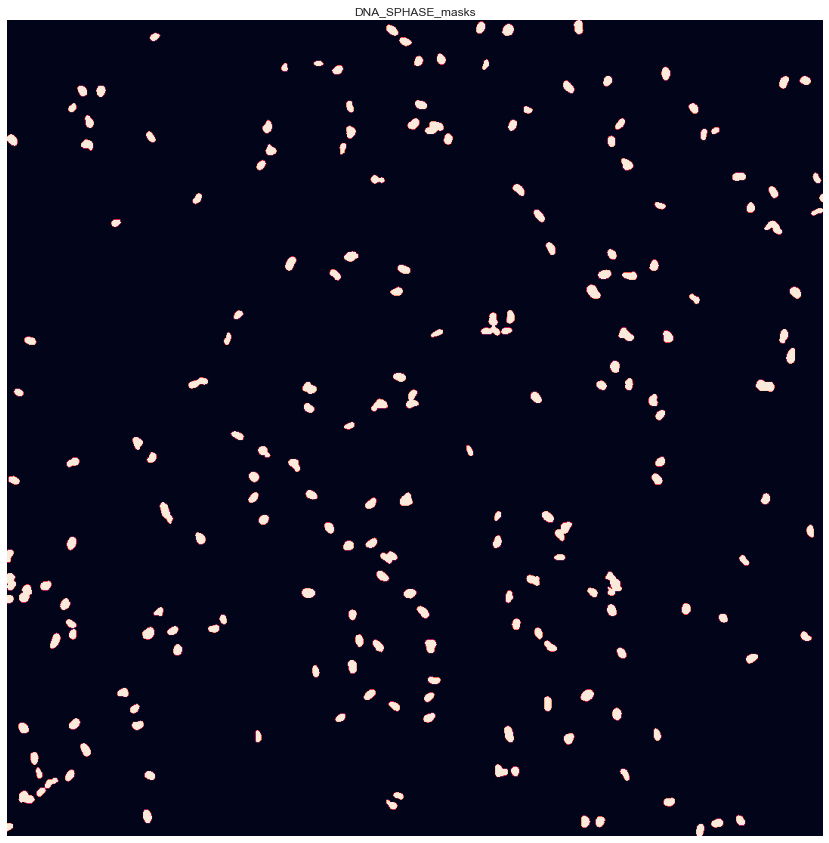

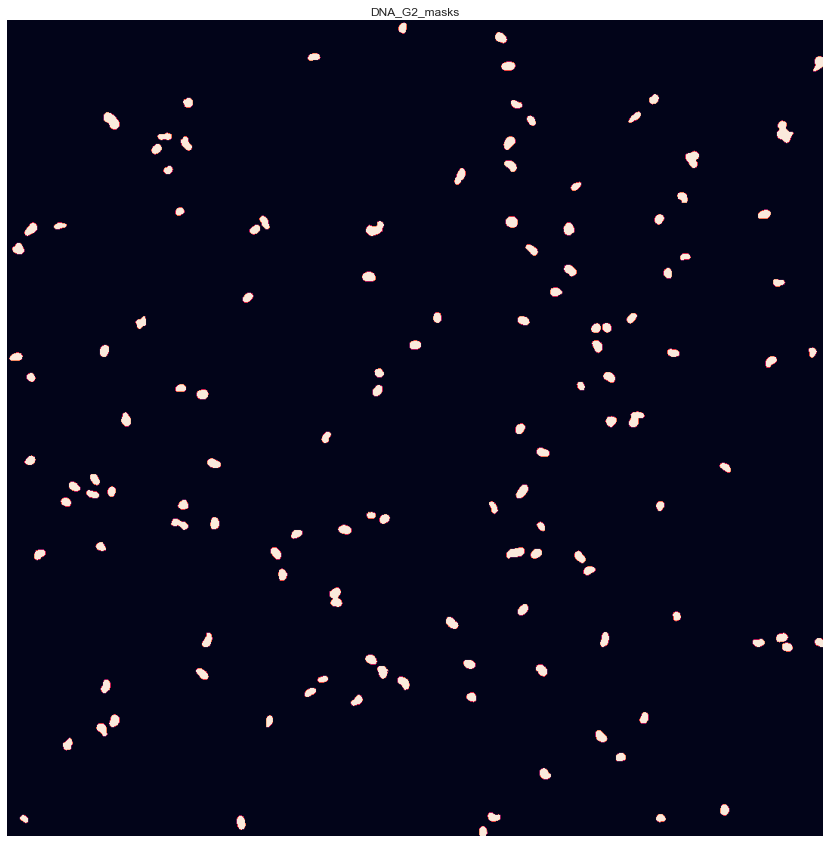

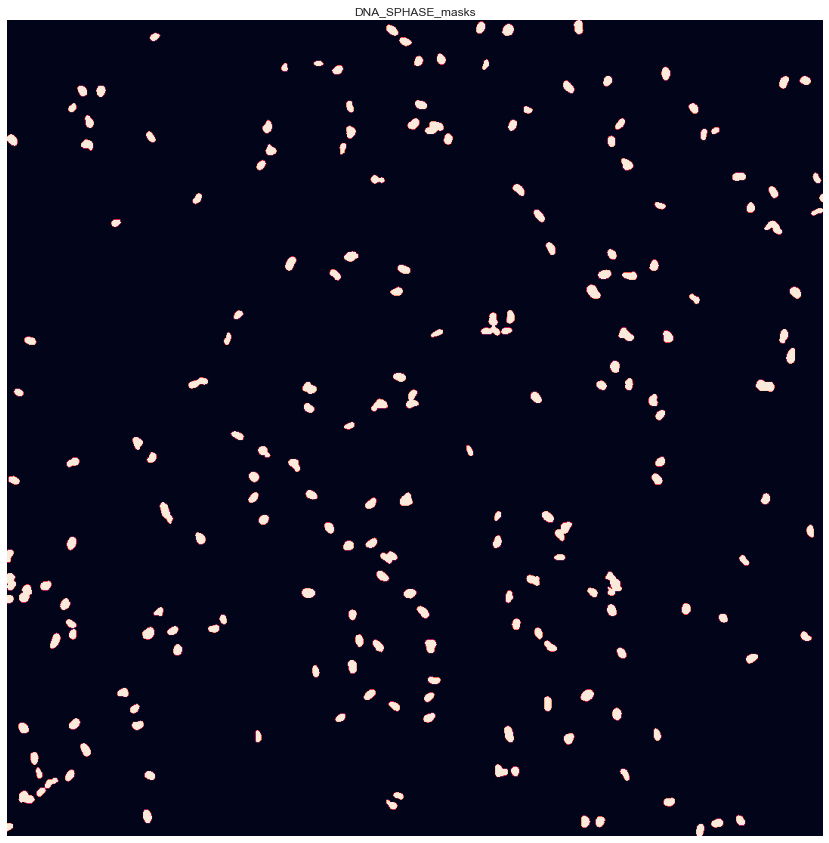

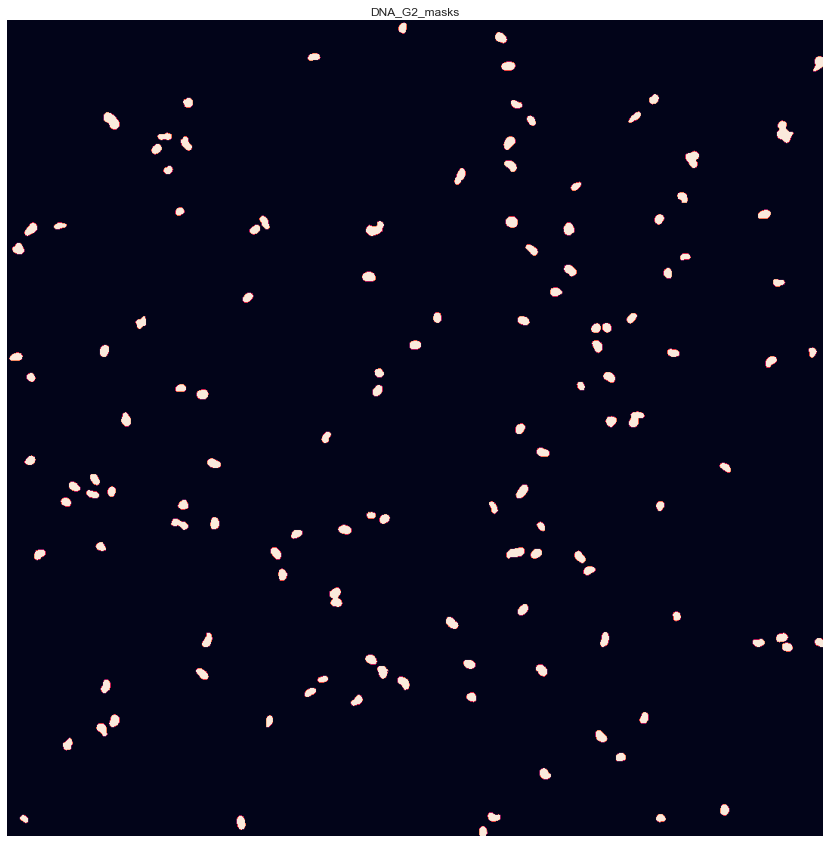

In [6]:
A=model_A(gpu=False,GUI=True,Masks=True)

In [ ]:
df_cell_cycle=measure.regionprops_table(n_masks, img, properties=Feature_list )
        df_cell_cycle=pd.DataFrame(df_cell_cycle)

In [7]:
def df_H3():
    df_H3 = measure.regionprops_table(n_masks, imgH3, properties= ['label','area','equivalent_diameter','mean_intensity'])
    df_H3=pd.DataFrame(df_H3)
    df_H3.rename(columns={'mean_intensity':'mean_intensity_H3'},inplace=True)
    return df_H3

In [10]:
df_final=pd.DataFrame()

df_result=A.df_nuclei_Phase()
df_final=pd.concat([df_final,df_result])

In [11]:
df_final

,label,area,equivalent_diameter,mean_intensity_nuclei,intensity_DAPI,DNA_content,mean_intensity_EdU,Phase
0,1,187,15.430353,8159.235294,1525777.0,1.384293,8946.652406,S Phase
1,2,99,11.227231,12957.222222,1282765.0,1.163816,555.262626,G1
2,3,151,13.865755,7395.523179,1116724.0,1.013171,7911.331126,S Phase
3,4,125,12.615663,13235.592000,1654449.0,1.501034,720.368000,G2
4,5,116,12.153016,7412.525862,859853.0,0.780120,613.077586,G1
...,...,...,...,...,...,...,...,...
539,540,146,13.634257,16143.369863,2356932.0,2.138376,1210.568493,S Phase
540,541,98,11.170384,11745.989796,1151107.0,1.044366,717.857143,G1
541,542,118,12.257335,19206.627119,2266382.0,2.056223,736.466102,G2
542,543,77,9.901487,14706.584416,1132407.0,1.027400,731.285714,G1


In [ ]:
A.dfH3()

In [ ]:
A.df_H3()

In [ ]:
plt.scatter(A.dna_norm()['DNA_content'],A.df_EdU()['mean_intensity'])
plt.axvline(x=1.5,c='red',)
plt.axhline(y=1000, color ="red", )
plt.xlabel('DNA_content',fontsize=8)
plt.ylabel('mean_intensity_EdU',fontsize=8)
plt.yscale('log')

In [ ]:
A.dna_list_S()

In [ ]:
A.dna_list_G1()

In [ ]:
# S phase
for i in A.dna_list_S():
    A.corresponding_img(Nuclei_id=i,bbox_large=0,DAPI=True)
